# Visualization of San Francisco Crime rate 
Below are the libraries used for the visuallization and to create the dataframes.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter("ignore")

In [2]:
df=pd.read_csv(r"C:\Users\Praveen\Downloads\police_department_data.csv")

In [3]:
df.head()

,incident_id,category,crime_description,crime_date,department_district,resolution,address,department_id,location
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,2016-01-29 11:00:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,12005827212120,"(37.775420706711, -122.403404791479)"
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",2016-01-29 11:00:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,12005827212168,"(37.775420706711, -122.403404791479)"
2,141059263,WARRANTS,WARRANT ARREST,2016-04-25 14:59:00,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,14105926363010,"(37.7299809672996, -122.388856204292)"
3,160013662,NON-CRIMINAL,LOST PROPERTY,2016-01-05 23:50:00,TENDERLOIN,NONE,JONES ST / OFARRELL ST,16001366271000,"(37.7857883766888, -122.412970537591)"
4,160002740,NON-CRIMINAL,LOST PROPERTY,2016-01-01 00:30:00,MISSION,NONE,16TH ST / MISSION ST,16000274071000,"(37.7650501214668, -122.419671780296)"


I have split the 'crime_data' variable into 'Date' and 'Time' 

In [4]:
df[['Date','Time']] = df.crime_date.str.split(expand=True)

In [5]:
df.head(5)

,incident_id,category,crime_description,crime_date,department_district,resolution,address,department_id,location,Date,Time
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,2016-01-29 11:00:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,12005827212120,"(37.775420706711, -122.403404791479)",2016-01-29,11:00:00
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",2016-01-29 11:00:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,12005827212168,"(37.775420706711, -122.403404791479)",2016-01-29,11:00:00
2,141059263,WARRANTS,WARRANT ARREST,2016-04-25 14:59:00,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,14105926363010,"(37.7299809672996, -122.388856204292)",2016-04-25,14:59:00
3,160013662,NON-CRIMINAL,LOST PROPERTY,2016-01-05 23:50:00,TENDERLOIN,NONE,JONES ST / OFARRELL ST,16001366271000,"(37.7857883766888, -122.412970537591)",2016-01-05,23:50:00
4,160002740,NON-CRIMINAL,LOST PROPERTY,2016-01-01 00:30:00,MISSION,NONE,16TH ST / MISSION ST,16000274071000,"(37.7650501214668, -122.419671780296)",2016-01-01,00:30:00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150500 entries, 0 to 150499
Data columns (total 11 columns):
incident_id            150500 non-null int64
category               150500 non-null object
crime_description      150500 non-null object
crime_date             150500 non-null object
department_district    150499 non-null object
resolution             150500 non-null object
address                150500 non-null object
department_id          150500 non-null int64
location               150500 non-null object
Date                   150500 non-null object
Time                   150500 non-null object
dtypes: int64(2), object(9)
memory usage: 12.6+ MB


Converted 'Date' varible into datetime datetype.
'Time' variable is further splited into hours, minutes, seconds.
Then converted 'Hr' variable into int datatype.
Droped remaining useless features.

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df[['Hr','Min','seconds']] = df.Time.str.split(":",expand=True)
df["Hr"] = df["Hr"].astype(str).astype(int)
df=df.drop(['crime_date','Min','seconds'],axis=1)

In [8]:
df.isnull().sum()

incident_id            0
category               0
crime_description      0
department_district    1
resolution             0
address                0
department_id          0
location               0
Date                   0
Time                   0
Hr                     0
dtype: int64

Only one missing, which is negligible so I droped using dropna fucntion.

In [9]:
df.dropna()

,incident_id,category,crime_description,department_district,resolution,address,department_id,location,Date,Time,Hr
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,12005827212120,"(37.775420706711, -122.403404791479)",2016-01-29,11:00:00,11
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,12005827212168,"(37.775420706711, -122.403404791479)",2016-01-29,11:00:00,11
2,141059263,WARRANTS,WARRANT ARREST,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,14105926363010,"(37.7299809672996, -122.388856204292)",2016-04-25,14:59:00,14
3,160013662,NON-CRIMINAL,LOST PROPERTY,TENDERLOIN,NONE,JONES ST / OFARRELL ST,16001366271000,"(37.7857883766888, -122.412970537591)",2016-01-05,23:50:00,23
4,160002740,NON-CRIMINAL,LOST PROPERTY,MISSION,NONE,16TH ST / MISSION ST,16000274071000,"(37.7650501214668, -122.419671780296)",2016-01-01,00:30:00,0
...,...,...,...,...,...,...,...,...,...,...,...
150495,161061000,ASSAULT,BATTERY,PARK,NONE,OAK ST / STANYAN ST,16106100004134,"(37.7714278595913, -122.453981622365)",2016-12-30,21:01:00,21
150496,176000742,NON-CRIMINAL,LOST PROPERTY,CENTRAL,NONE,JACKSON ST / SANSOME ST,17600074271000,"(37.7966261239618, -122.401857374739)",2016-12-30,08:00:00,8
150497,176000758,LARCENY/THEFT,PETTY THEFT OF PROPERTY,CENTRAL,NONE,PINE ST / TAYLOR ST,17600075806372,"(37.7906727649886, -122.41226909106)",2016-12-29,20:00:00,20
150498,176000764,LARCENY/THEFT,GRAND THEFT OF PROPERTY,CENTRAL,NONE,200 Block of STOCKTON ST,17600076406374,"(37.7882745285785, -122.406658711008)",2016-12-30,10:00:00,10


In [10]:
df.duplicated(subset=None, keep='first').sum()

0

Checked is there any duplicate values.

In [11]:
df.nunique()

incident_id            116699
category                   39
crime_description         726
department_district        10
resolution                 14
address                 16130
department_id          150500
location                19386
Date                      366
Time                     1439
Hr                         24
dtype: int64

To check no of unique values in the variables I use nunique function.

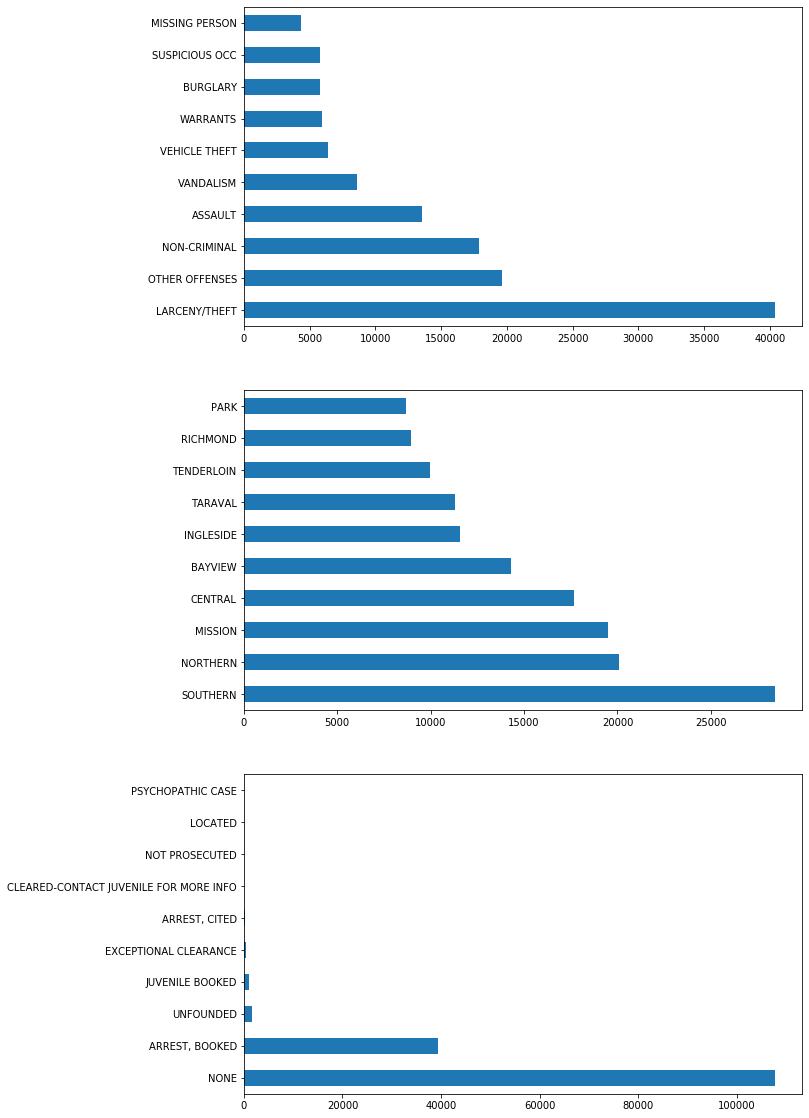

In [50]:
f, axes = plt.subplots(3,1,figsize=(10,20))

df.category.value_counts().nlargest(10).plot(kind='barh',ax=axes[0])

df.department_district.value_counts().plot(kind='barh',ax=axes[1])

df.resolution.value_counts().nlargest(10).plot(kind='barh',ax=axes[2])

plt.show()

From the above plots, in categories theft, other offences, and non crime are most recorded reports.

If we see district wise data, Southern,Northern and Mission are having more crime rate than other districts.

Coming to resolution, only arrest,booked cases are resolved while most of them are unsolved. 

# Riskness locationwise

In [13]:
locationwise=pd.DataFrame(df.groupby('location')['department_id'].count().reset_index().sort_values(by='department_id',ascending=False))
locationwise

,location,department_id
12618,"(37.775420706711, -122.403404791479)",3536
8304,"(37.7564864109309, -122.406539115148)",625
15042,"(37.7841893501425, -122.407633520742)",624
15262,"(37.7850629421661, -122.406520987144)",513
10438,"(37.7650501214668, -122.419671780296)",494
...,...,...
6093,"(37.7446734224505, -122.389762420144)",1
2981,"(37.7286703882035, -122.435751507904)",1
15274,"(37.7851012946674, -122.492692861809)",1
6092,"(37.7446608873671, -122.441771900779)",1


Created a separate dataframe for location and applied groupby function, Used 'department_id' for aggregation function.

In [14]:
locationwise['department_id'].unique()

array([3536,  625,  624,  513,  494,  448,  429,  419,  364,  328,  314,
        312,  294,  286,  281,  267,  257,  252,  249,  244,  241,  238,
        237,  236,  234,  224,  214,  212,  210,  205,  203,  201,  199,
        198,  195,  190,  187,  184,  183,  181,  177,  175,  174,  172,
        168,  166,  164,  163,  154,  153,  151,  149,  144,  141,  137,
        136,  135,  134,  132,  130,  128,  127,  126,  125,  124,  122,
        121,  118,  117,  116,  115,  112,  111,  110,  109,  108,  107,
        106,  105,  104,  103,  102,  101,  100,   99,   98,   97,   96,
         95,   94,   93,   92,   91,   90,   89,   88,   87,   86,   85,
         84,   83,   82,   81,   80,   79,   78,   77,   76,   75,   74,
         73,   72,   71,   70,   69,   68,   67,   66,   65,   64,   63,
         62,   61,   60,   59,   58,   57,   56,   55,   54,   53,   52,
         51,   50,   49,   48,   47,   46,   45,   44,   43,   42,   41,
         40,   39,   38,   37,   36,   35,   34,   

These are the unique values which are in department_id after the groupby function applied to location.

In [15]:
locationwise['department_id'].mean()

7.763334365005674

In [16]:
locationwise['Risk_Location']=(locationwise['department_id'].apply(lambda x: "High risk" if x >=30 else("Modren risk" if x < 30 and x > 8 else "Low risk")))

Created a newcolumn as 'Risk_location' where 'High risk','Modren risk' and 'low risk' are categorised based on the fequent occurance of crime in the same location.
This is done by using lamda fuction.

In [17]:
location_wiserisk=locationwise.drop(['department_id'],axis=1)

In [18]:
data=pd.merge(df,location_wiserisk,on='location')

Merged with original dataframe based on the location variable.

In [19]:
data

,incident_id,category,crime_description,department_district,resolution,address,department_id,location,Date,Time,Hr,Risk_Location
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,12005827212120,"(37.775420706711, -122.403404791479)",2016-01-29,11:00:00,11,High risk
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,12005827212168,"(37.775420706711, -122.403404791479)",2016-01-29,11:00:00,11,High risk
2,160010511,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",SOUTHERN,NONE,800 Block of BRYANT ST,16001051164020,"(37.775420706711, -122.403404791479)",2016-01-04,21:45:00,21,High risk
3,160019466,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,16001946665016,"(37.775420706711, -122.403404791479)",2016-01-08,01:50:00,1,High risk
4,160030876,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",SOUTHERN,NONE,800 Block of BRYANT ST,16003087628160,"(37.775420706711, -122.403404791479)",2016-01-10,20:45:00,20,High risk
...,...,...,...,...,...,...,...,...,...,...,...,...
150495,160522431,ASSAULT,BATTERY,NORTHERN,NONE,3000 Block of SCOTT ST,16052243104134,"(37.7978592340263, -122.440774262649)",2016-06-27,20:30:00,20,Low risk
150496,160828085,LARCENY/THEFT,PETTY THEFT FROM UNLOCKED AUTO,MISSION,NONE,1400 Block of BRYANT ST,16082808506223,"(37.7686113896564, -122.410702462011)",2016-10-11,06:45:00,6,Low risk
150497,160980293,BURGLARY,"BURGLARY, HOT PROWL, ATTEMPTED FORCIBLE ENTRY",INGLESIDE,NONE,100 Block of EDNA ST,16098029305082,"(37.7278772089568, -122.446626280635)",2016-11-24,00:30:00,0,Low risk
150498,161000406,NON-CRIMINAL,FOUND PROPERTY,TARAVAL,NONE,1800 Block of 26TH AV,16100040672000,"(37.7529567745119, -122.48397688699)",2016-12-09,19:30:00,19,Low risk


In [20]:
data['Risk_Location'].value_counts()

High risk      61801
Low risk       45150
Modren risk    43549
Name: Risk_Location, dtype: int64

From the above count, we can see that the 'High risk' locations are high than remaining.

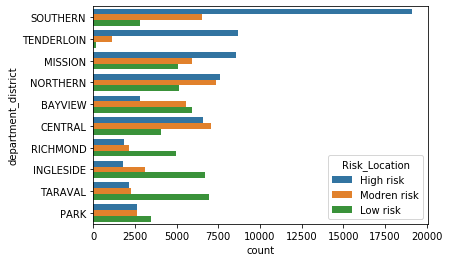

In [52]:
sns.countplot(y='department_district',hue='Risk_Location',data=f_data)

More number of the high risk loctions fall in Southern, Tenderloin, and Mission where as low risk locations fall in Taraval, Ingleside and Bayview.

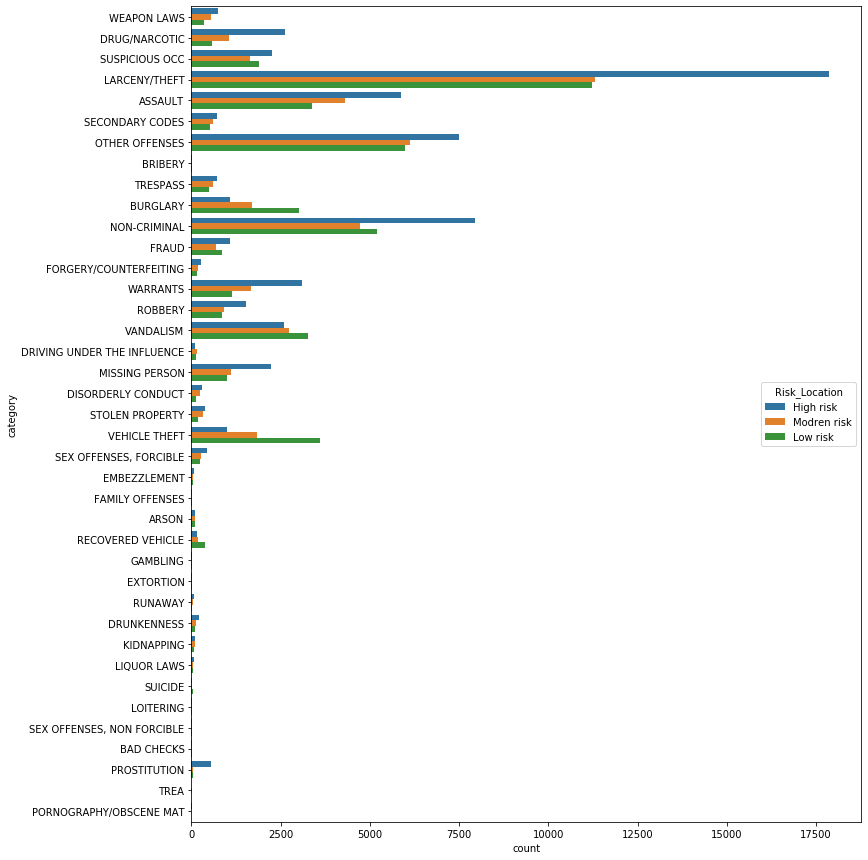

In [53]:
plt.figure(figsize=(12,15))
sns.countplot(y='category',hue='Risk_Location',data=f_data)

Theft,other offence, non crime,and assault are the most occured in high risk locations while vandalism, vehicle theft are the most happend in the low risk location.

# Same above process is used for the below code to get riskness based on the hourly.

In [21]:
Timewise=pd.DataFrame(df.groupby('Hr')['department_id'].count().reset_index().sort_values(by='department_id',ascending=False))

In [22]:
Timewise['department_id'].unique()

array([9718, 9559, 9021, 8981, 8656, 8329, 8098, 7621, 7480, 7268, 7099,
       6941, 6786, 6573, 6483, 5865, 5575, 4359, 3894, 3494, 2553, 2518,
       1885, 1744], dtype=int64)

In [23]:
Timewise['department_id'].mean()

6270.833333333333

In [24]:
Timewise['Danger_Time']=(Timewise['department_id'].apply(lambda x: "High_risk_period" if x >=7500 else("Modren_risk_period" if x < 7500 and x > 3000 else "Low_risk_period")))

In [25]:
Timewise

,Hr,department_id,Danger_Time
18,18,9718,High_risk_period
17,17,9559,High_risk_period
12,12,9021,High_risk_period
19,19,8981,High_risk_period
16,16,8656,High_risk_period
15,15,8329,High_risk_period
20,20,8098,High_risk_period
14,14,7621,High_risk_period
21,21,7480,Modren_risk_period
13,13,7268,Modren_risk_period


In [26]:
Time_wise_risk=Timewise.drop(['department_id'],axis=1)

In [27]:
f_data=pd.merge(data,Time_wise_risk,on='Hr')
f_data

,incident_id,category,crime_description,department_district,resolution,address,department_id,location,Date,Time,Hr,Risk_Location,Danger_Time
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,12005827212120,"(37.775420706711, -122.403404791479)",2016-01-29,11:00:00,11,High risk,Modren_risk_period
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,12005827212168,"(37.775420706711, -122.403404791479)",2016-01-29,11:00:00,11,High risk,Modren_risk_period
2,160051606,DRUG/NARCOTIC,POSSESSION OF BASE/ROCK COCAINE FOR SALE,SOUTHERN,NONE,800 Block of BRYANT ST,16005160616623,"(37.775420706711, -122.403404791479)",2016-01-26,11:45:00,11,High risk,Modren_risk_period
3,160051606,DRUG/NARCOTIC,POSSESSION OF METH-AMPHETAMINE FOR SALE,SOUTHERN,NONE,800 Block of BRYANT ST,16005160616652,"(37.775420706711, -122.403404791479)",2016-01-26,11:45:00,11,High risk,Modren_risk_period
4,160023207,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE,SOUTHERN,NONE,800 Block of BRYANT ST,16002320764070,"(37.775420706711, -122.403404791479)",2016-01-09,11:00:00,11,High risk,Modren_risk_period
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150495,160285855,VEHICLE THEFT,STOLEN TRUCK,MISSION,NONE,3700 Block of 21ST ST,16028585507025,"(37.7562964247746, -122.432085187014)",2016-04-04,07:30:00,7,Low risk,Modren_risk_period
150496,160376103,VEHICLE THEFT,STOLEN AUTOMOBILE,TARAVAL,NONE,200 Block of SANTAANA AV,16037610307021,"(37.7324546514796, -122.467743193972)",2016-05-05,07:45:00,7,Low risk,Modren_risk_period
150497,160975852,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,BAYVIEW,"ARREST, BOOKED",CRISP RD / REVERE AV,16097585265010,"(37.7272177632741, -122.382322174639)",2016-12-01,07:35:00,7,Low risk,Modren_risk_period
150498,160975852,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION,BAYVIEW,"ARREST, BOOKED",CRISP RD / REVERE AV,16097585262050,"(37.7272177632741, -122.382322174639)",2016-12-01,07:35:00,7,Low risk,Modren_risk_period


In [54]:
f_data.Danger_Time.value_counts()

Modren_risk_period    71817
High_risk_period      69983
Low_risk_period        8700
Name: Danger_Time, dtype: int64

Above plot shows, danger and safe hours to go out.

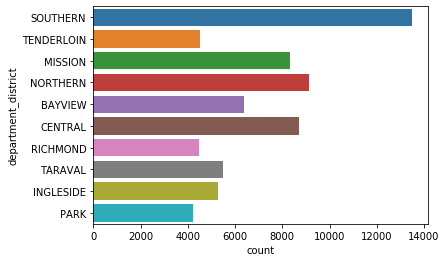

In [48]:
high_risk_time=f_data[f_data['Danger_Time']=='High_risk_period']
sns.countplot(y='department_district',data=high_risk_time)

In Southern,Mission,Northern and central recorded the most number of cases in the danger hours ie 'High risk period'.

# Summary:
From visualization, in Southern, Mission, Northern districts reported high crimes and Theft, other offence, non crime cases are reported more.

Number of the cases in danger hours and high risk location fall in Southern, Mission, Northern districts and when it comes to type of crimes: Theft, other offence, non crime cases.
